In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

### Linearity assesment

In [2]:
latent = np.load("sider_latent.npy")

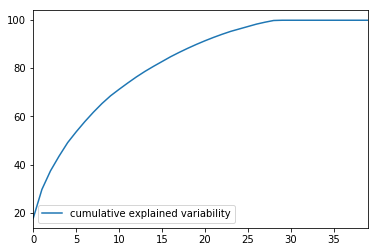

In [3]:
pca = PCA(n_components=40)
reduced = pca.fit_transform(latent)
df=pd.DataFrame({"cumulative explained variability": np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)})
df.plot()

The space does not seem to be linearly decomposable, and redundant. It seems it could as well be 25-dimensional. 
- A non-linear model or an autoencoder might help
- Perhaps we should use correlation distance to account for non-linearity

In [4]:
X=reduced[:,:25]

### 2d tSNE

Text(0.5,1,'Latent space of first 25 components')

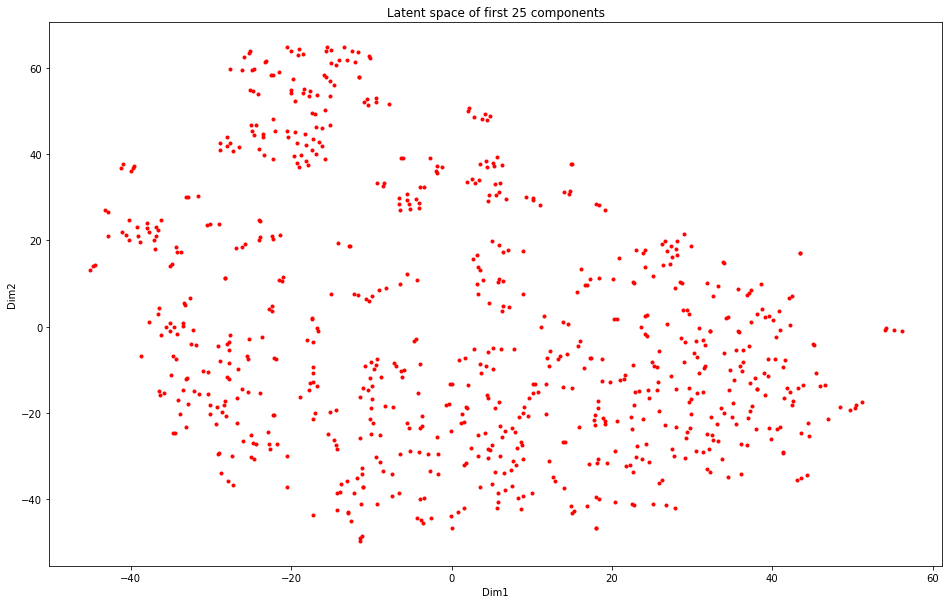

In [6]:
tsne=TSNE(2,20,n_iter=5000,metric="correlation")
tsne_2d = tsne.fit_transform(X)

fig = plt.figure(figsize=(16,10))
ax=plt.scatter(x=tsne_2d[:,0], y=tsne_2d[:,1], color="r", marker=".")
plt.xlabel("Dim1"); plt.ylabel("Dim2"); plt.title("Latent space of first 25 components")

### 3d tSNE

In [7]:
tsne=TSNE(3,20,n_iter=5000,metric="correlation")
tsne_3d = tsne.fit_transform(X)

Text(0.5,0.92,'Latent spacem first 25 components, 3D')

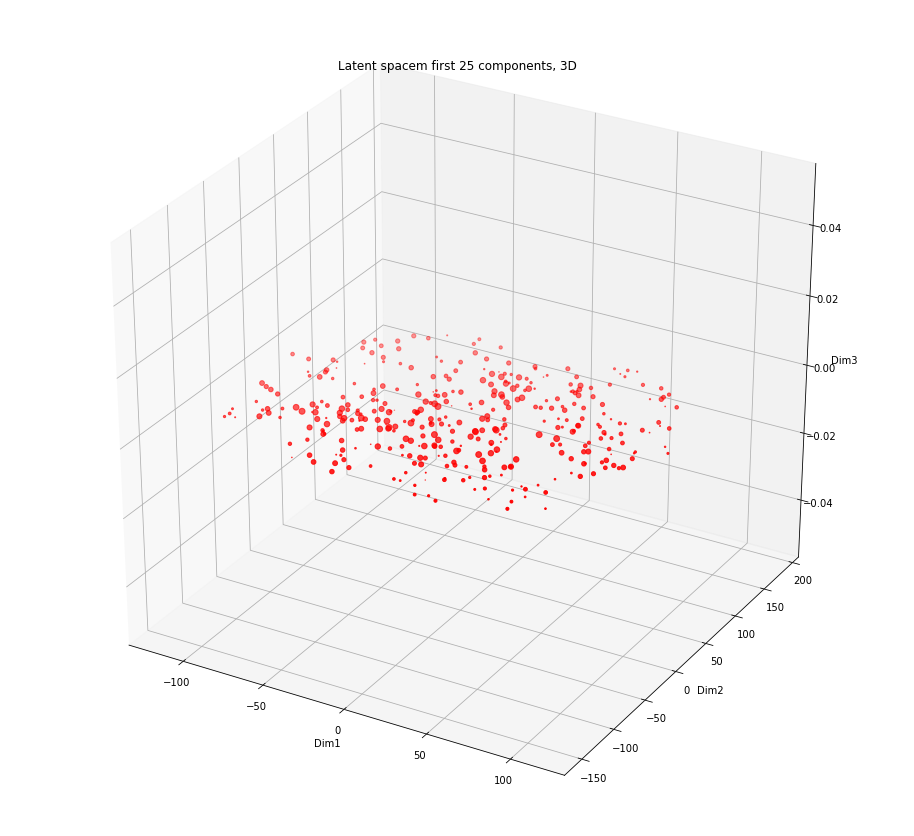

In [13]:
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(tsne_3d[:,0], tsne_3d[:,1], tsne_3d[:,2],c='r', marker='.')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')
plt.title("Latent spacem first 25 components, 3D")

Some clusters are visible, but they are very few and far between

### Approx number of clusters

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

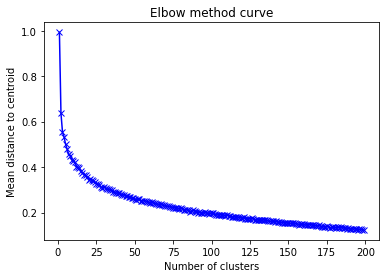

In [19]:
d = []
K = range(1,200)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    d.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'correlation'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, d, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("Mean distance to centroid")
plt.title('Elbow method curve')
plt.show()

The curve does not seem that we have a clear elbow. 
- May be we have between 5 to 10 clusters in the area where curve bends rapidly
- The space does not seem to cluster well